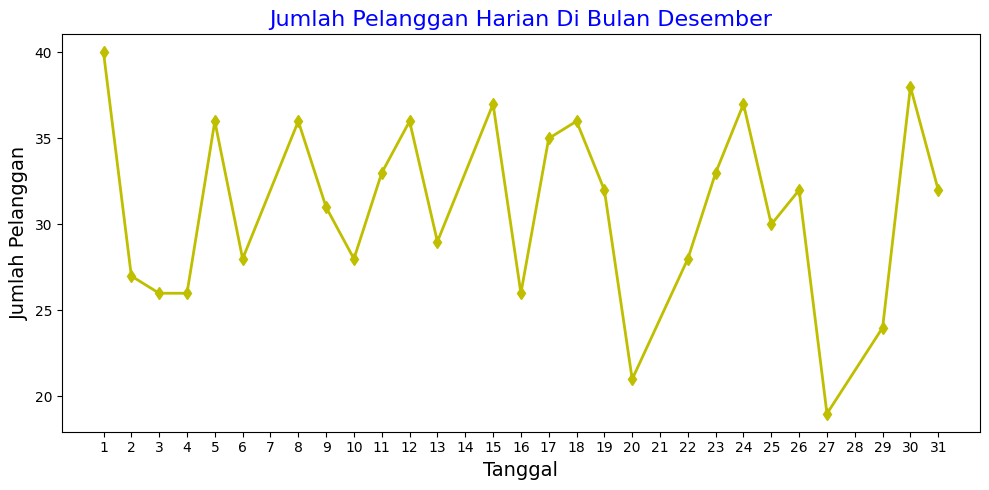

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

df['order_date'] = pd.to_datetime(df['order_date'])

december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, color='y', marker='d', linestyle='-', linewidth=2)
plt.title('Jumlah Pelanggan Harian Di Bulan Desember', color='b', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(range(1, 32))
plt.tight_layout()

plt.show()

In [15]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
dec_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

top5_brands = dec_data.groupby('brand')['quantity'].sum().nlargest(5)
dataset_top5brand_dec = dec_data[dec_data['brand'].isin(top5_brands.index)]

print(top5_brands)

brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


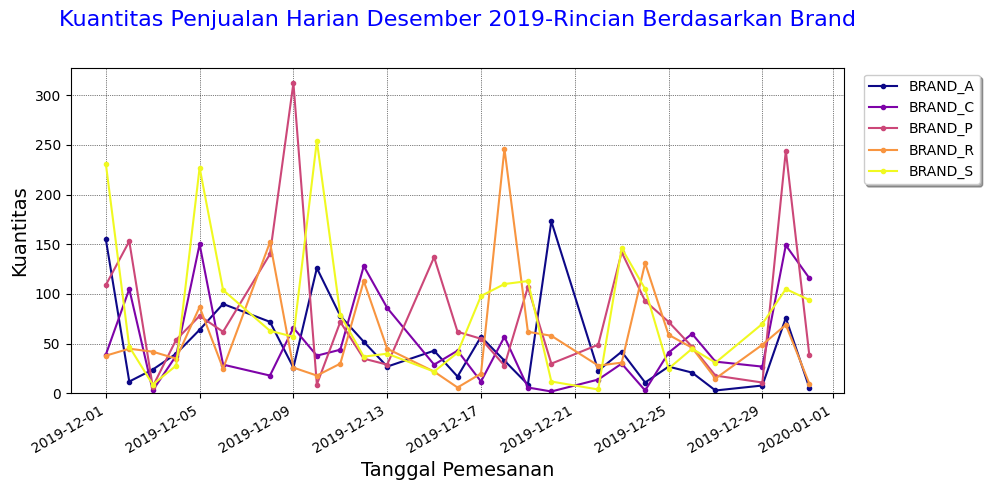

In [28]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Kuantitas Penjualan Harian Desember 2019-Rincian Berdasarkan Brand',loc='center',pad=30, fontsize=16, color='b')
plt.xlabel('Tanggal Pemesanan', fontsize = 14)
plt.ylabel('Kuantitas',fontsize = 14)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='green',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='green'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

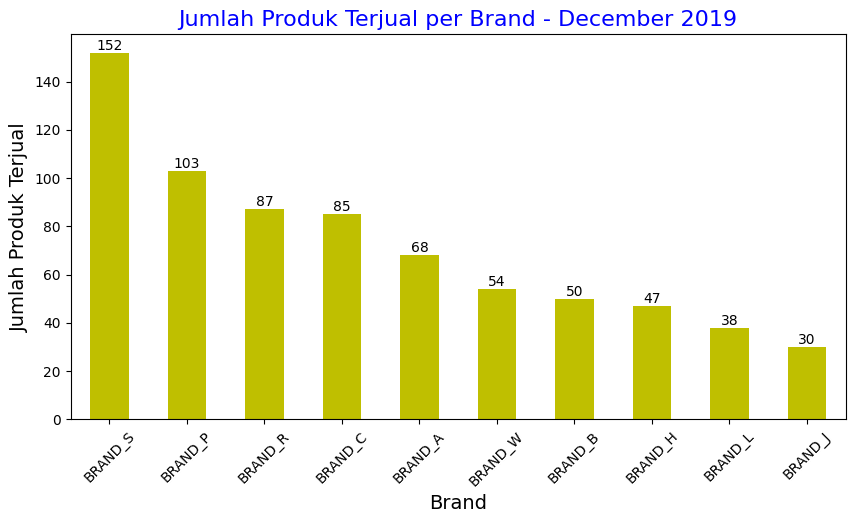

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

df['order_date'] = pd.to_datetime(df['order_date'])

df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

brand_product_count = df_december.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
brand_product_count.plot(kind='bar', color='y')

plt.xlabel('Brand', fontsize=14)
plt.ylabel('Jumlah Produk Terjual', fontsize=14)
plt.title('Jumlah Produk Terjual per Brand - December 2019', fontsize=16, color='b')
plt.xticks(rotation=45)

for i, v in enumerate(brand_product_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

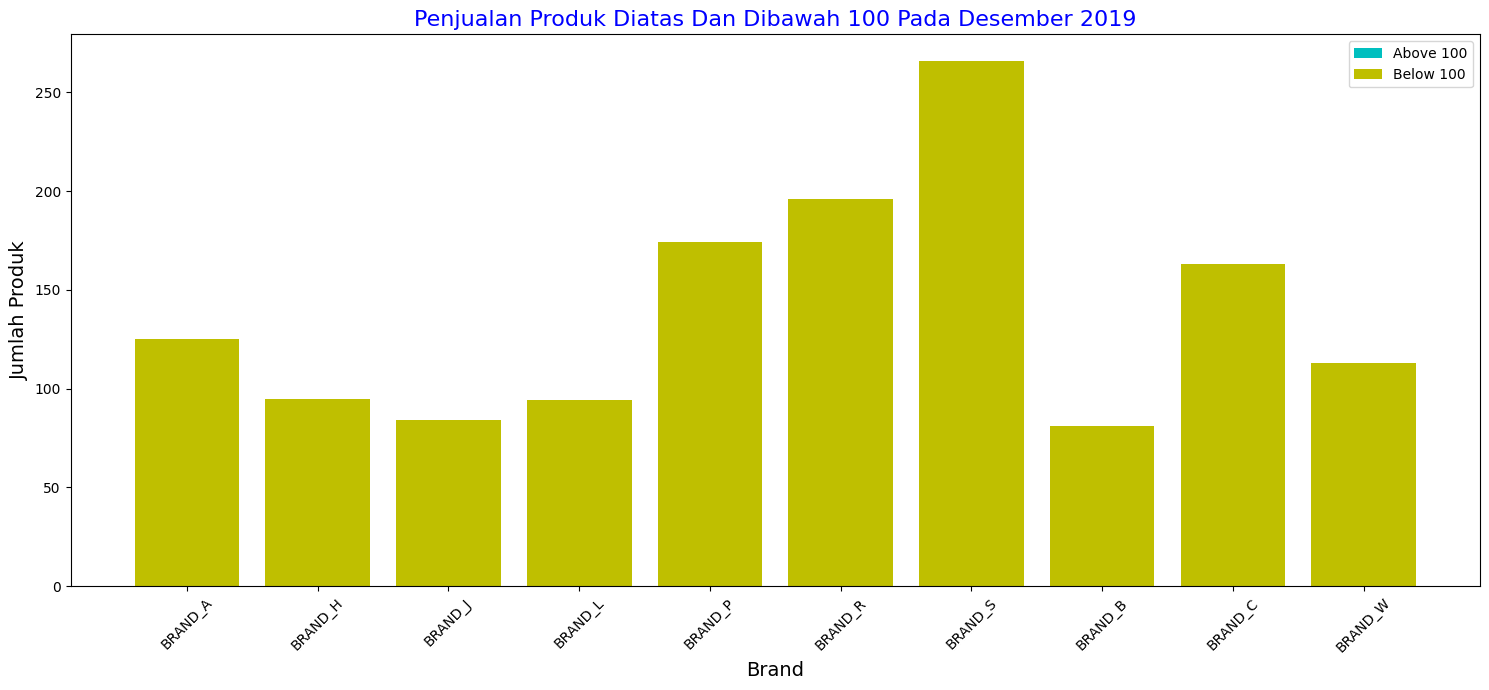

In [62]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df_december = df[df['order_month'] == '2019-12']
daily_customers = df_december.groupby('order_date')['customer_id'].nunique()
dec_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

top5_brands = dec_data.groupby('brand')['quantity'].sum().nlargest(5)
dataset_top5brand_dec = dec_data[dec_data['brand'].isin(top5_brands.index)]

above_100 = dec_data[dec_data['quantity'] >= 100]
below_100 = dec_data[dec_data['quantity'] < 100]

above_100_count = above_100.groupby('brand')['product_id'].count()
below_100_count = below_100.groupby('brand')['product_id'].count()

plt.figure(figsize=(15, 7))
plt.bar(above_100_count.index, above_100_count.values, label='Above 100', color='c')
plt.bar(below_100_count.index, below_100_count.values, label='Below 100', color='y')
plt.title('Penjualan Produk Diatas Dan Dibawah 100 Pada Desember 2019', fontsize=16, color='b')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Jumlah Produk', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

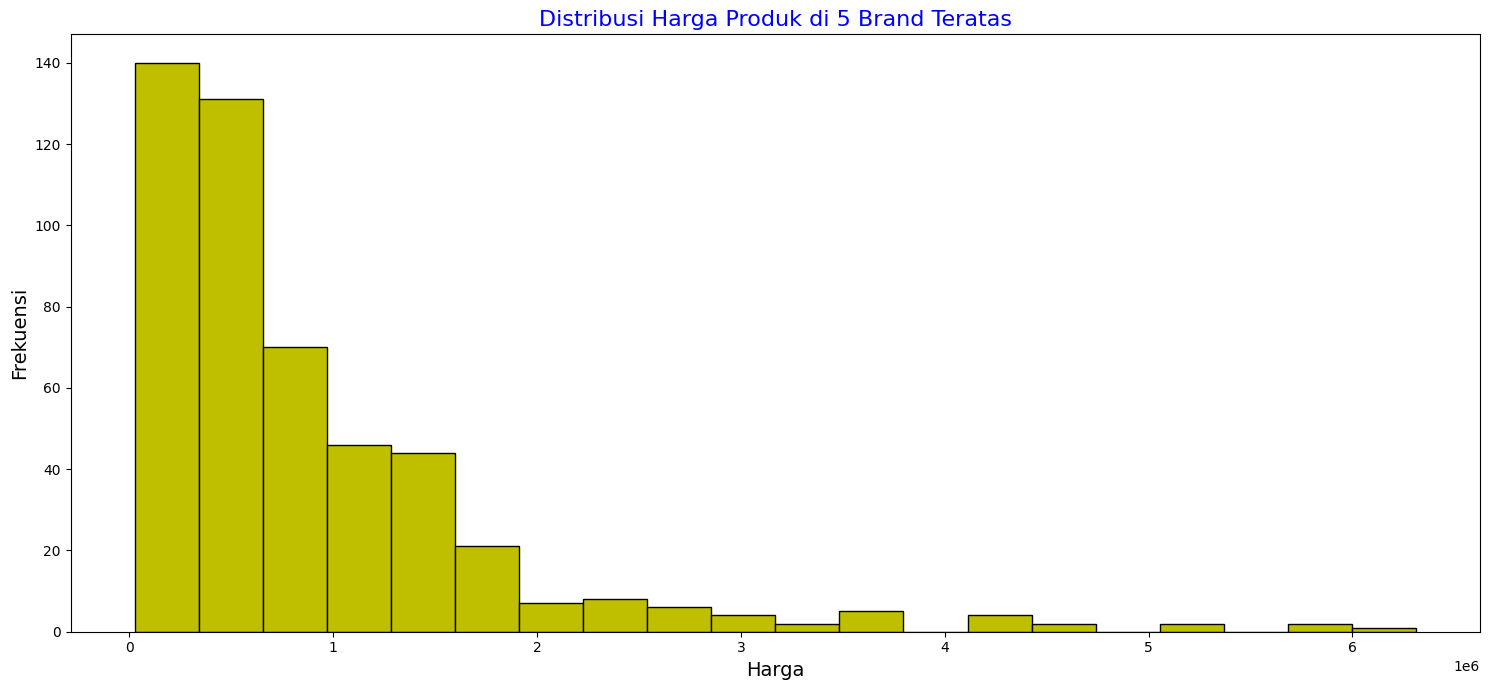

In [59]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

top5_brand_median_prices = dataset_top5brand_dec.groupby('product_id')['item_price'].median()

plt.figure(figsize=(15, 7))
plt.hist(top5_brand_median_prices, bins=20, edgecolor='black', color='y')
plt.title('Distribusi Harga Produk di 5 Brand Teratas',fontsize=16, color='b')
plt.xlabel('Harga', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.tight_layout()
plt.show()

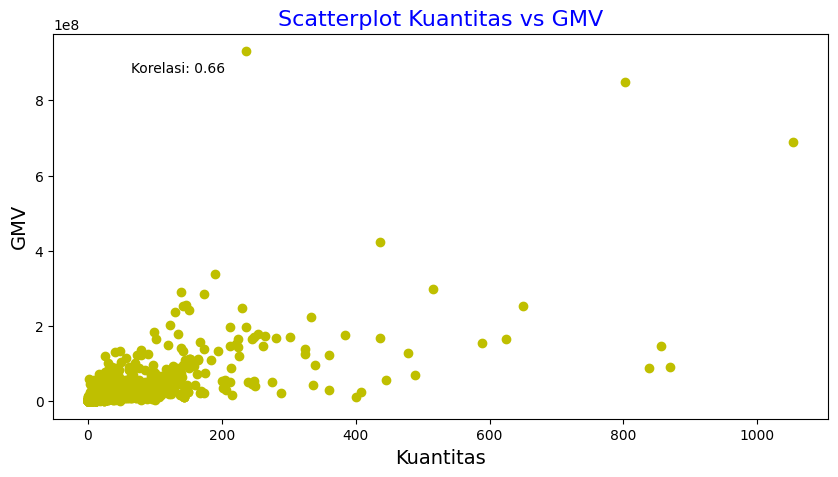

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(data_product['quantity'], data_product['GMV'], color='y')
plt.xlabel('Kuantitas', fontsize=14)
plt.ylabel('GMV', fontsize=14)
plt.title('Scatterplot Kuantitas vs GMV',fontsize=16, color='b')
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_gmv:.2f}', transform=plt.gca().transAxes)

plt.show()


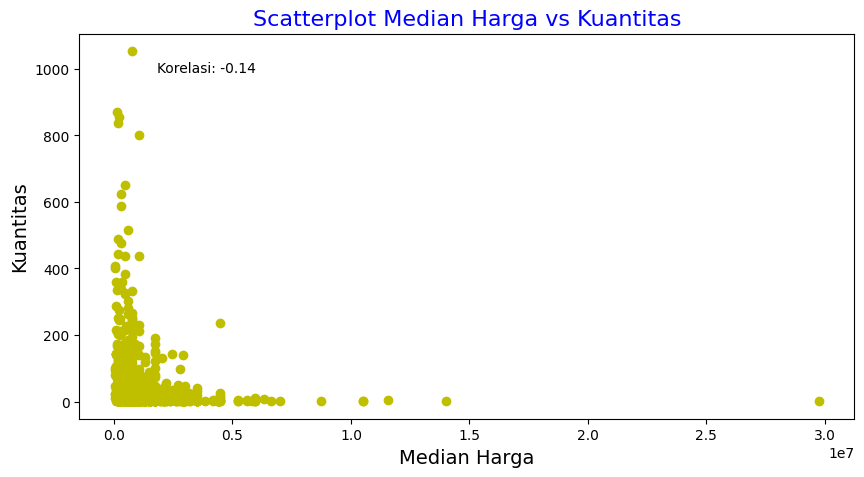

In [65]:
df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(data_product['item_price'], data_product['quantity'], color='y')
plt.xlabel('Median Harga', fontsize=14)
plt.ylabel('Kuantitas', fontsize=14)
plt.title('Scatterplot Median Harga vs Kuantitas', fontsize=16, color='b')
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_price:.2f}', transform=plt.gca().transAxes)
plt.show()